In [1]:
# vectorized operations and numerical calcs
import numpy as np
# tabular data window dressing and syntax
import pandas as pd
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# data source
from pydataset import data
# stats calculations
from scipy import stats
# creds
from env import user, password, host

# Overview Exercises

Has the network latency gone up since we switched internet service providers?

Question: Is there a difference in network latency since switching internet providers

Null Hypothesis: There is no difference in network latency since switching internet providers

Alt Hypothesis: There is a difference in network latency since switching internet providers

True Positive: There is a difference

True Negative: There is no difference

T1 Error: Claims there is no difference, but there actually is

T2 Error: Claims there is a difference, but there actually isn't
    

Is the website redesign any good?

Question: Does the website resign make an impact on traffic?

Null Hypothesis: the website resign does not make an impact on traffic

Alt Hypothesis: the website resign does make an impact on traffic

True Positive: There is an impact

True Negative: There is no impact

T1 Error: Claims there isn't impact, but there actually is

T2 Error: Claims there impact, but there actually isn't

Is our television ad driving more sales?

Question: Does our tv ad increase sales?

Null Hypothesis: Our tv ad doesn't make a difference in sales

Alt Hypothesis: Our tv ad increases sales

True Positive: The ad increases sales

True Negative: The ad doesn't increase sales

T1 Error: Claims there isn't an increase, there is actually

T2 Error: Claims there is an increase, there isn't actually

# Comparison of Means

Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?

In [2]:
# grades of students on second floor
# grades of all students
# i have a continuous variable in grades ==> means test
# across two different categories (means test as opposed to corr)
# the two groups: second floor students (subset)
# versus all students (population)
# subset v population: 1-sample
# non-directional difference: two tailed
# what I want here (presuming appropriate parameters)
# is a two-tailed, one sample t-test

Are adults who drink milk taller than adults who dont drink milk?

In [3]:
# adults that drink milk
# adults that dont drink milk
# two sub groups: milk drinkers vs non milk drinkers
# two independent groups, no overlap ==> two sample
# one-tailed test because we want to know if one is specifcally
# taller than the other height_a > height_b
# a: one tailed, independent t-test

Is the price of gas higher in texas or in new mexico?


In [4]:
# one-tailed: asking specifically if its *higher* in one state
# two-sample: two subgroups of texas and nm

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [5]:
# mean that is different across three different groups
# non-directional, because its across more than two groups
# we would use an anova test

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 

Use a .05 level of significance.


In [6]:
# two sample t-test

first_office = pd.Series(np.random.normal(90, 15, 40)) #mean, std_dev, sample
second_office = pd.Series(np.random.normal(100, 20, 50))

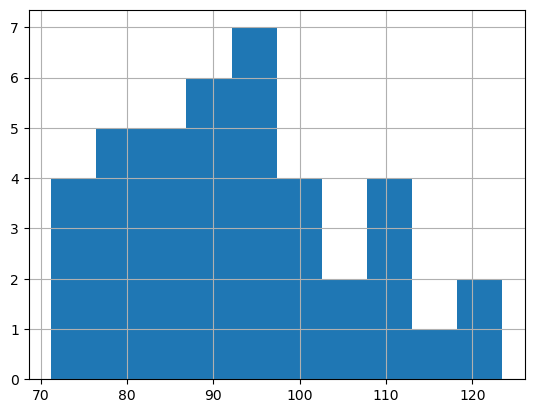

In [7]:
first_office.hist()
plt.show()

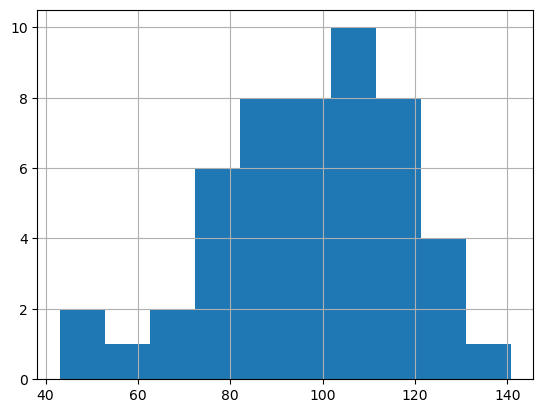

In [8]:
second_office.hist()
plt.show()

H$_0$ - There will be no difference in average time it takes to sell a home between both offices

H$_a$ - There will be a difference in average time it takes to sell a home between both offices

In [9]:
first_office = pd.Series(np.random.normal(90, 15, 40))
second_office = pd.Series(np.random.normal(100, 20, 50))
alpha = 0.05 # level of significance

In [10]:
print(first_office.var())
print(second_office.var())

205.486385644694
414.72900706648466


In [11]:
# Test statistical computations
t, p = stats.ttest_ind(first_office, second_office, equal_var = False)
t, p/2

(-2.621498355238759, 0.0051689995305953945)

In [12]:
# Results
print("Is p/2 < alpha?", p/2 < alpha)

Is p/2 < alpha? True


In [13]:
if p/2 > alpha:
    print(f"We fail to reject Null Hypothesis")
else:
    print(f"We reject Null Hypothesis")

We reject Null Hypothesis


Load the mpg dataset and use it to answer the following questions:

In [14]:
mpg = data('mpg')
mpg['ave_mpg'] = ((mpg.cty)+(mpg.hwy)/2)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,ave_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,32.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,35.5
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,35.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,36.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,33.0
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,35.5
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,29.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,31.0


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [15]:
# two-sample ttest

fuel_eff_99 = mpg[mpg.year == 1999].ave_mpg
fuel_eff_08 = mpg[mpg.year == 2008].ave_mpg

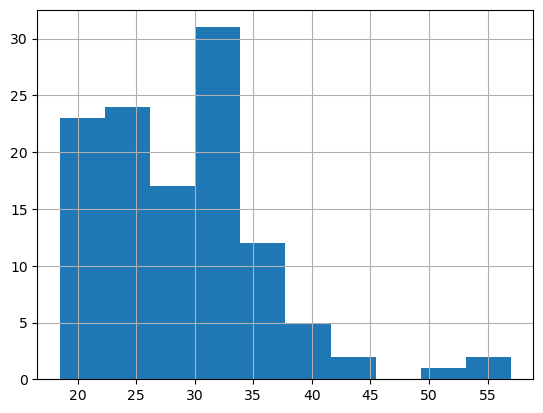

In [16]:
fuel_eff_99.hist()
plt.show()

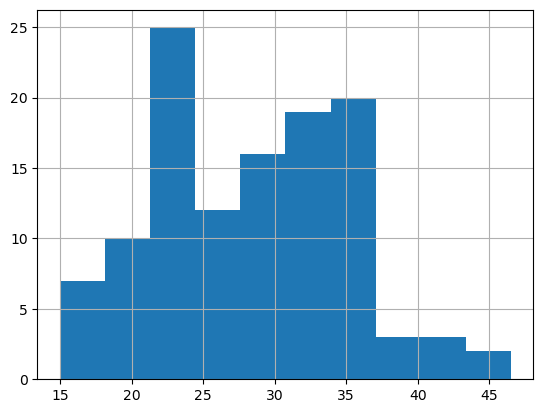

In [17]:
fuel_eff_08.hist()
plt.show()

Hypothesis

H$_0$: The average mpg of cars from 1999 are equal to the average mpg of cars in 2008

H$_a$: The average mpg of cars from 1999 are less than the average mpg of cars in 2008

In [18]:
print(fuel_eff_99.var())
print(fuel_eff_08.var())
alpha = 0.5 #significance level

54.9290450928382
47.87183171234894


In [19]:
t, p = stats.ttest_ind(fuel_eff_99, fuel_eff_08, equal_var = False)
t, p

(0.3236957615075299, 0.7464613597643072)

In [20]:
print("is p/2 < alpha?", p/2 < alpha)
print("is t < 0? ", t < 0)

is p/2 < alpha? True
is t < 0?  False


In [21]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


Are compact cars more fuel-efficient than the average car?

In [22]:
compact = mpg[mpg['class'] == 'compact']
mpg_compact = compact.ave_mpg
mpg_average = mpg.ave_mpg

In [23]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,ave_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,32.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,35.5
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,35.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,36.0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,33.0
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,35.5
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,29.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,31.0


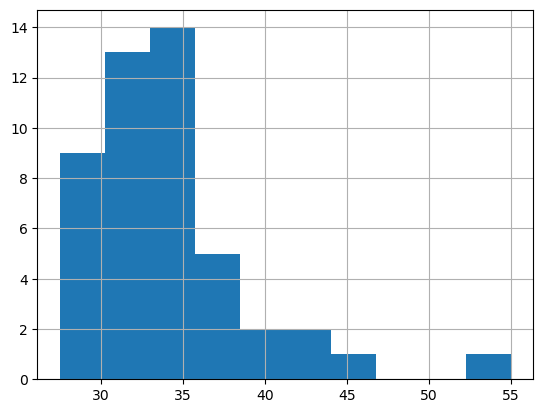

In [24]:
mpg_compact.hist()
plt.show()

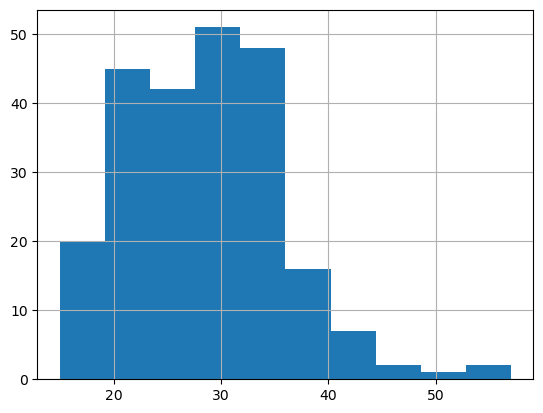

In [25]:
mpg_average.hist()
plt.show()

Hypothesis

H$_0$: The average mpg of compact cars is equal to the average mpg of all cars

H$_0$: The average mpg of compact cars is greater than the average mpg of all cars

In [26]:
print(mpg_compact.var())
print(mpg_average.var())
alpha = 0.5

27.041396854764116
51.202950185246294


In [27]:
t, p = stats.ttest_ind(mpg_compact, mpg_average, equal_var = False)
t, p

(6.393397817705701, 8.315679405056163e-09)

In [28]:
print("is p/2 < alpha?", p/2 < alpha)
print("is t < 0? ", t < 0)

is p/2 < alpha? True
is t < 0?  False


In [29]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


Do manual cars get better gas mileage than automatic cars?

In [30]:
mpg['transmission'] = mpg.trans.str[:-4]
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,ave_mpg,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,32.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,35.5,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,35.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,36.0,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,29.0,auto


In [31]:
auto_mpg = mpg[mpg['transmission'] == 'auto'].ave_mpg
manual_mpg = mpg[mpg['transmission'] == 'manual'].ave_mpg

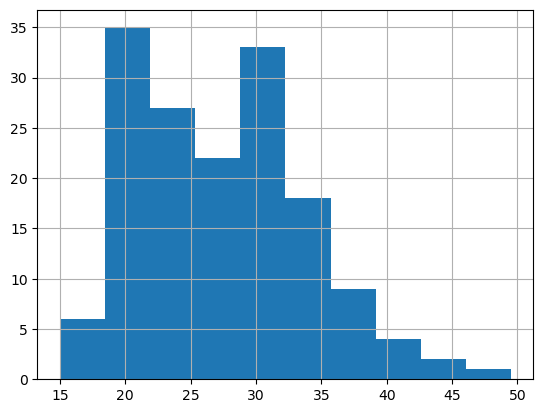

In [32]:
auto_mpg.hist()
plt.show()

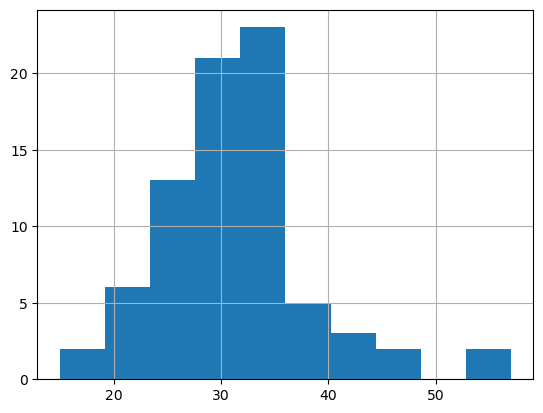

In [33]:
manual_mpg.hist()
plt.show()

Hypothesis

H$_0$: The mpg for auto transmissions are equal to the mpg of manual transmissions.

H$_a$: The mpg for auto transmissions are greater than the mpg of manual transmissions.

In [34]:
print(auto_mpg.var())
print(manual_mpg.var())
alpha = 0.5

43.387412216233834
54.45625427204375


In [35]:
t, p = stats.ttest_ind(auto_mpg, manual_mpg, equal_var = False)
t, p

(-4.4872852093583395, 1.5159804538232562e-05)

In [36]:
print("is p/2 < alpha?", p/2 < alpha)
print("is t < 0? ", t < 0)

is p/2 < alpha? True
is t < 0?  True


In [37]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


# Correlation

Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?


Continuous v. Continuous -> PearsonsR

Do guys and gals quit their jobs at the same rate?

Categorical v. Categorical -> Chi Squared

Does the length of time of the lecture correlate with a students grade?

PearsonsR

Use the telco_churn data.

Does tenure correlate with monthly charges?

In [38]:
# import telco churn data
telco_churn = pd.read_csv('/Users/robcasey/Desktop/telco_churn.csv')

In [39]:
# replace null values with 0
telco_churn.fillna(value=0, inplace=True)
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


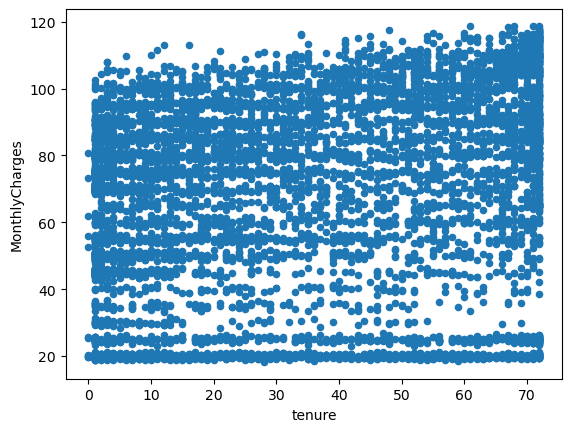

In [40]:
# tenure vs monthly charges
telco_churn.plot.scatter(x='tenure', y='MonthlyCharges')
plt.show()

H$_o$: there is no linear relationship between tenure and monthly charges

H$_a$: there is a linear relationship between tenure and monthly charges

In [41]:
alpha = .05

x = telco_churn.tenure
y = telco_churn.MonthlyCharges

r, p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)

r =  0.2478998562861525
p =  4.094044991483017e-99


In [42]:
if p < alpha:
    print("We reject Null Hypothesis")  
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


Total charges?

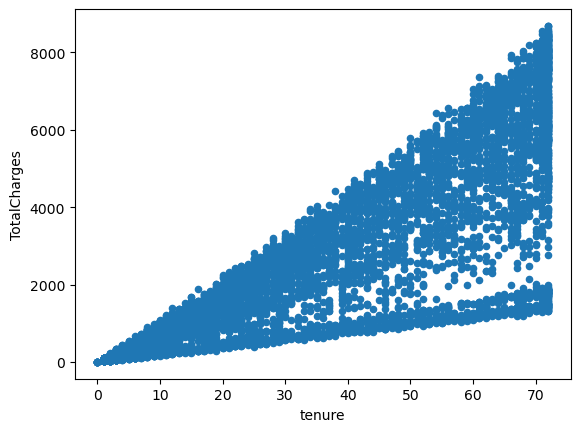

In [43]:
# tenure vs. total charges
telco_churn.plot.scatter(x='tenure', y='TotalCharges')
plt.show()

H$_o$: there is no linear relationship between tenure and total charges

H$_a$: there is a linear relationship between tenure and total charges

In [44]:
alpha = .05

x = telco_churn.tenure
y = telco_churn.TotalCharges

r, p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)

r =  0.8261783979502475
p =  0.0


In [45]:
if p < alpha:
    print("We reject Null Hypothesis")  
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis


What happens if you control for phone and internet service?

In [46]:
#Not sure tbh. Missed some class during this module.

Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [47]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
sql_query = '''
SELECT *
FROM employees
JOIN salaries as s
	USING(emp_no)
WHERE s.to_date > NOW();'''

In [48]:
employees_with_salaries = pd.read_sql(sql_query, url)
emp = employees_with_salaries
emp.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


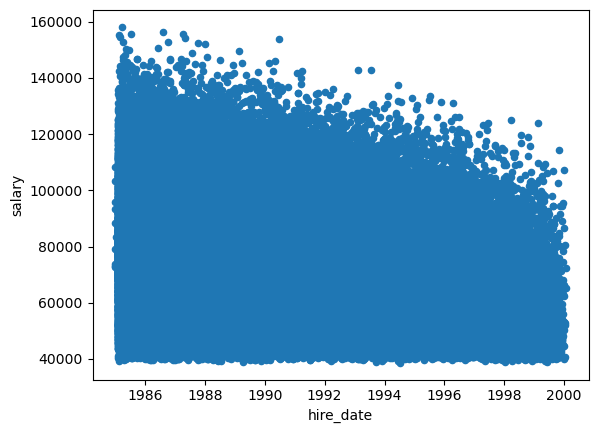

In [60]:
# tenure v. salary

emp.plot.scatter(x='hire_date', y='salary')
plt.show()

H$_0$
: There is no linear relationship between tenure and salary

H$_a$
: There is a linear relattionship between tenure and salary

In [63]:
emp['tenure'] = emp.to_date - emp.from_date
emp.head()T

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,"2920672 days, 0:00:00"
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,"2920996 days, 0:00:00"
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,"2920875 days, 0:00:00"
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,"2920879 days, 0:00:00"
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,"2920958 days, 0:00:00"
